<H1>How to use NN_CRN

<H5>
Smoothed ReLU : define n1, n2, n3(number of nodes of each layer)/H(smoothing parameter)/init_mu, init_sigma(initialization parameters for the layer)/dt(size of timestep)/k_u(learning rate)/noise/timelen(how many timesteps in one iteration)  

Leaky ReLU : define n1, n2, n3/alpha, beta(Derivative of Leaky ReLU on positive domain and negative domain, respectively)/init_mu, init_sigma, dt, k_u, noise, timelen

Each network has two functions : run, run_for_single_data  

run(label_x, label_y, test_x, test_y, noise_controller, epoch, N, dataset_type) : run for the train dataset(label_x, label_y) and validation dataset(test_x, test_y) for given epoch. N means the size of train dataset. Dataset type is 'XOR' or 'iris' or 'MNIST' or 'sine'.(But accuracy data is useless for sine dataset) Noise controller is 0 when noise is not used. It is 1 when noise is added on reaction rate. It is 2 when noise is added on each neural network layer. It is 3 when noise is added on input data chemical species. This function returns train loss, validation loss, accuracy, and history of parameters(weight and bias).

run_for_some_data(label_x, label_y, noise_controller, run_num, N) : Execute training for run_num iteration, and returns history of Y value, W1(0,0) value, and derivative of activation function as its input for each layers.

We also provide some visualization tools for each dataset in visualization.py module.

In [1]:
import NN_CRN
import numpy as np
import datasets
import matplotlib.pyplot as plt
import visualization

c:\Users\IFF\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [22]:
N_L = NN_CRN.NN_CRN_Leaky_ReLU(n1=64, n2=4, n3=2, alpha=1, beta=0.3, init_mu=0, init_sigma=0.1, dt=0.01, k_u=0.0001, noise=0.1, timelen=500)

In [23]:
label_x, label_y, test_x, test_y, N = datasets.downsampled_mnist()

c:\Users\IFF\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:432: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


In [24]:
train_loss_L, validation_loss_L, accuracy_L, params_L = N_L.run(label_x = label_x, label_y = label_y, test_x = test_x, test_y = test_y, noise_controller = 0, epoch = 2, N = N, dataset_type = 'MNIST')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Visualization functions

1. XOR_smoothed_ReLU(Network, train_loss, accuracy, params, N, epoch, noise_controller)/XOR_Leaky_ReLU(Network, train_loss, accuracy, params, N, epoch, noise_controller) : returns train loss graph, accuracy graph, training process visualization

2. sine_smoothed_ReLU(Network, train_loss, noise_controller)/sine_Leaky_ReLU(Network, train_loss, noise_controller) : returns train loss graph

3. MNIST_smoothed_ReLU(Network, train_loss, validation_loss, accuracy, N, epoch, noise_controller)/MNIST_Leaky_ReLU(Network, train_loss, validation_loss, accuracy, N, epoch, noise_controller) : returns train loss graph, accuracy graph, classification result

4. iris_smoothed_ReLU(Network, train_loss, validation_loss, accuracy, N, epoch, noise_controller)/iris_Leaky_ReLU(Network, train_loss, validation_loss, accuracy, N, epoch, noise_controller) : returns train loss graph, accuracy graph, classification result

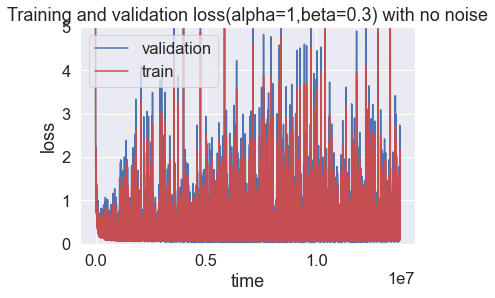

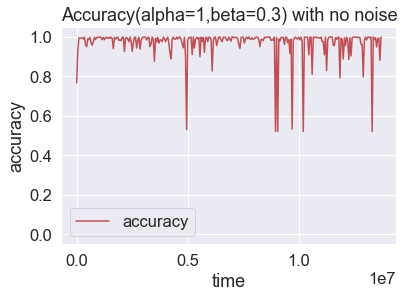

c:\Users\IFF\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:432: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


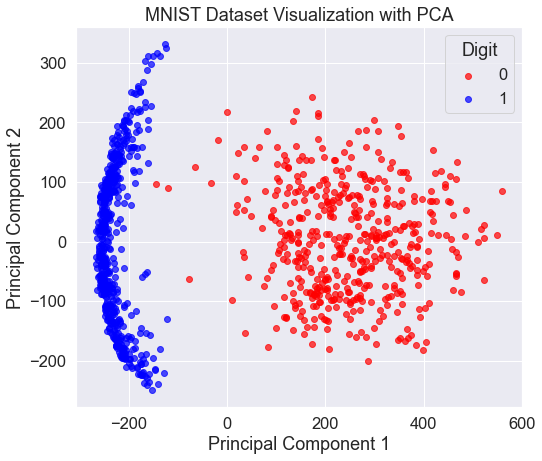

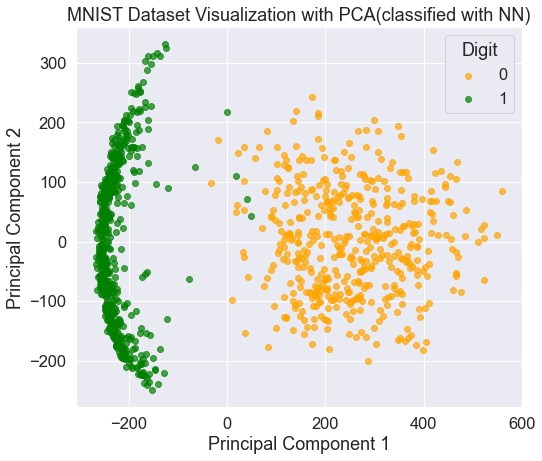

In [27]:
visualization.MNIST_Leaky_ReLU(N_L, train_loss_L, validation_loss_L, accuracy_L, N=N, epoch=2, noise_controller=0)

In [ ]:
#Code for Figure 4, Figure 6
Yvals, w2vals, Dz1vals, Dz0vals = N_L.run_for_some_data(label_x = label_x, label_y = label_y, noise_controller = 0, run_num = 4, N = N)

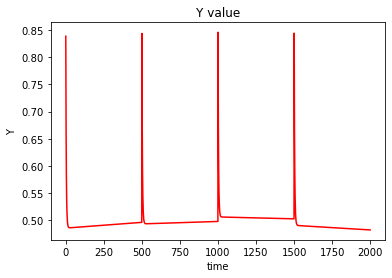

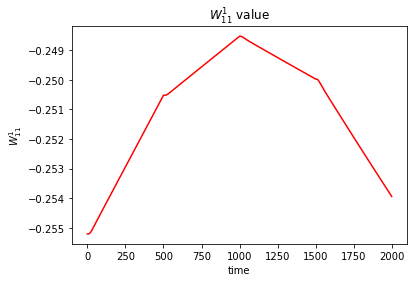

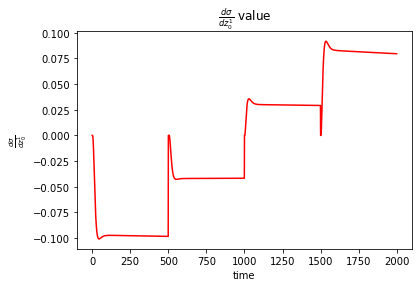

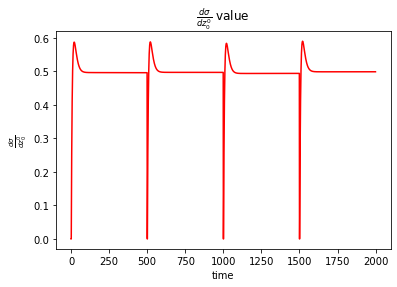

In [22]:
plt.plot(Yvals, 'r')
plt.title('Y value')
plt.xlabel('time')
plt.ylabel('Y')
plt.show()

plt.plot(w2vals, 'r')
plt.title('$W^1_{11}$ value')
plt.xlabel('time')
plt.ylabel('$W^1_{11}$')
plt.show()

plt.plot(Dz1vals,'r')
plt.title('$\\frac{d\sigma}{dz^1_0}$ value')
plt.xlabel('time')
plt.ylabel('$\\frac{d\sigma}{dz^1_0}$')
plt.show()

plt.plot(Dz0vals,'r')
plt.title('$\\frac{d\sigma}{dz^0_0}$ value')
plt.xlabel('time')
plt.ylabel('$\\frac{d\sigma}{dz^0_0}$')
plt.show()


<H2>
Example : Mean error about error rate(Figure 7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

No handles with labels found to put in legend.


1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299


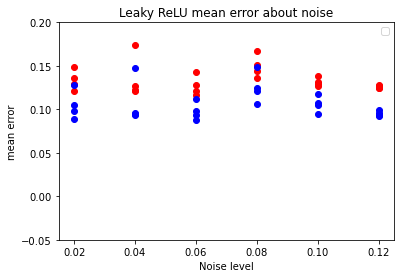

In [4]:
avg_train_loss = [[],[],[],[]]
avg_val_loss = [[],[],[],[]]
for k in range(4) : 
    N1 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.02, timelen=50)
    N2 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.04, timelen=50)
    N3 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.06, timelen=50)
    N4 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.08, timelen=50)
    N5 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.1, timelen=50)
    N6 = NN_CRN.NN_CRN_Leaky_ReLU(n1=1, n2=10, n3=1,alpha=1,beta=0.3, init_mu=0, init_sigma=0.1, dt=0.1, k_u=0.001, noise=0.12, timelen=50)
    N_array = [N1,N2,N3,N4,N5,N6]
    for i in range(6) : 
        train_loss, validation_loss, accuracy, params = N_array[i].run(label_x,label_y,test_x,test_y,noise_controller=1,epoch=100,N=N,dataset_type='sine')
        avg_train_loss[k].append(np.mean([train_loss[(10-j)*(N*10)-1] for j in range(10)]))
        avg_val_loss[k].append(np.mean([validation_loss[(10-j)*(N*10)-1] for j in range(10)]))

plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_train_loss[0],c='r')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_train_loss[1],c='r')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_train_loss[2],c='r')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_train_loss[3],c='r')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_val_loss[0],c='b')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_val_loss[1],c='b')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_val_loss[2],c='b')
plt.scatter([0.02,0.04,0.06,0.08,0.1,0.12],avg_val_loss[3],c='b')
plt.title('Leaky ReLU mean error about noise')
plt.ylim(-0.05,0.2)
plt.xlabel('Noise level')
plt.ylabel('mean error')
plt.legend()
plt.show()

